# 2020 Diffusie eind opdracht
***

## Datum: 27 maart 2020
## Hoofdstuk: 7
## Groep nummer: 32
***
## Student
    naam: Julian van Doorn
    Studentnr: s2518074


In [1]:
from __future__ import division

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Opgave 7.2a

In [15]:
def diffusie(t, x, D, C, dx, dt):
    for i in range(len(t) - 1):
        dFdx = (np.roll(C[:, i], -1, axis=0) - 2 * C[:, i] + np.roll(C[:, i], 1, axis=0)) / ((2 * dx)**2)
        C[:, i + 1] = C[:, i] + dt * D * dFdx

    return C

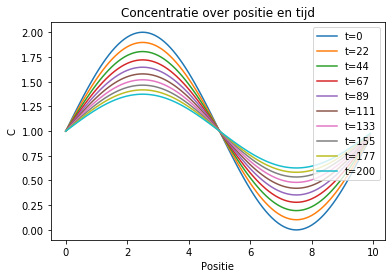

In [17]:
dx = 0.1
x = np.arange(0, 10, dx)
dt = 0.4
t = np.arange(0, 200, dt)

k = 1
D = 1/20

C = np.tile(np.nan, (len(x), len(t)))
C[:, 0] = 1 + np.sin(k * 2 * np.pi * x / 10)

C = diffusie(t, x, D, C, dx, dt)

for i in np.linspace(0, len(t) - 1, 10):
    plt.plot(x, C[:, int(i)], label=f't={i * dt:.0f}')

plt.xlabel('Positie')
plt.ylabel('C')
plt.title('Concentratie over positie en tijd')
plt.legend()
plt.show()

# Opgave 7.2b

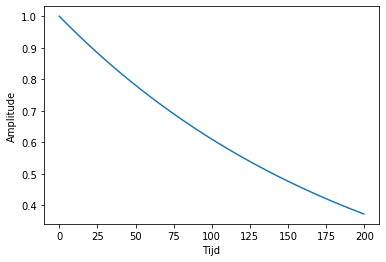

In [19]:
A = np.max(C, axis=0) - np.mean(C, axis=0)

plt.plot(t, A)
plt.xlabel('Tijd')
plt.ylabel('Amplitude')
plt.show()

# Opgave 7.2c

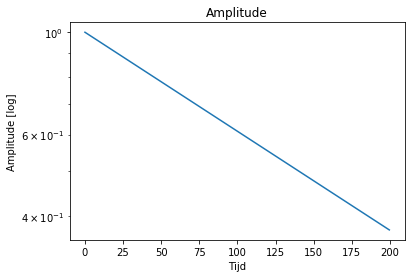

Voor t=75 is log(A) een factor e kleiner geworden.


In [22]:
plt.semilogy(t, A)
plt.title('Amplitude')
plt.xlabel('Tijd')
plt.ylabel('Amplitude [log]')
plt.show()

print(f'Voor t={np.argmax(np.log(A) < -1/np.e) * dt:.0f} is log(A) een factor e kleiner geworden.')

# Opgave 7.2d

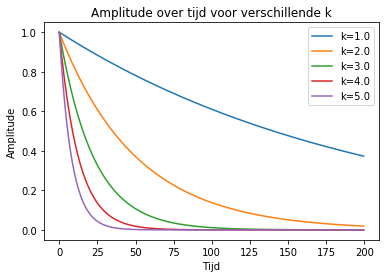

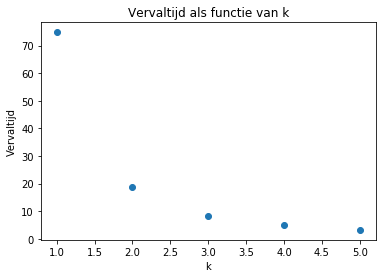

In [24]:
vervaltijd = []

for k in np.linspace(1, 5, 5):
    C = np.tile(np.nan, (len(x), len(t)))
    C[:, 0] = 1 + np.sin(k * 2 * np.pi * x / 10)

    C = diffusie(t, x, D, C, dx, dt)
    
    A = np.max(C, axis=0) - np.mean(C, axis=0)
    plt.plot(t, A, label=f'k={k}')
    
    vervaltijd.append(np.argmax(np.log(A) < -1/np.e) * dt)

plt.title('Amplitude over tijd voor verschillende k')
plt.xlabel('Tijd')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.scatter(np.linspace(1, 5, 5), vervaltijd)
plt.xlabel('k')
plt.ylabel('Vervaltijd')
plt.title('Vervaltijd als functie van k')
plt.show()

In sommige gevallen wordt de evenwichtspositie bereikt. Er is dan geen exponenteel verval meer.

# Opgave 7.2e

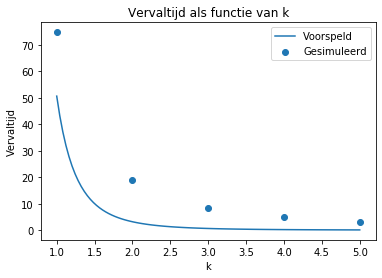

In [29]:
plt.scatter(np.linspace(1, 5, 5), vervaltijd, label='Gesimuleerd')
plt.plot(np.linspace(1, 5, 100), 1 / (D * (np.square(np.linspace(1, 5, 100)) * 2 * np.pi / 10) ** 2), label='Voorspeld')

plt.xlabel('k')
plt.ylabel('Vervaltijd')
plt.title('Vervaltijd als functie van k')
plt.legend()
plt.show()

# Opgave 7.2f

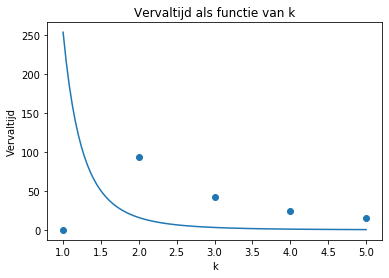

In [31]:
D = 1/100

vervaltijd = []

for k in np.linspace(1, 5, 5):
    C = np.tile(np.nan, (len(x), len(t)))
    C[:, 0] = 1 + np.sin(k * 2 * np.pi * x / 10)

    C = diffusie(t, x, D, C, dx, dt)
    
    A = np.max(C, axis=0) - np.mean(C, axis=0)
    
    vervaltijd.append(np.argmax(np.log(A) < -1/np.e) * dt)
    
plt.scatter(np.linspace(1, 5, 5), vervaltijd, label='Voorspeld')
plt.plot(np.linspace(1, 5, 100), 1 / (D * (np.square(np.linspace(1, 5, 100)) * 2 * np.pi / 10) ** 2), label='Gesimuleerd')

plt.xlabel('k')
plt.ylabel('Vervaltijd')
plt.title('Vervaltijd als functie van k')
plt.show()

# Opgave 7.3a

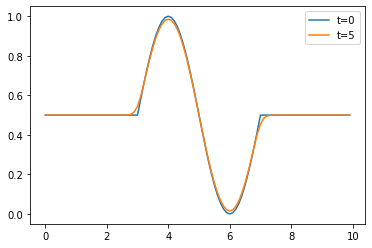

In [33]:
dx = 0.1
x = np.arange(0, 10, dx)
dt = 0.1
t = np.arange(0, 5, dt)

D = 1/100

C = np.tile(np.nan, (len(x), len(t)))
C[:, 0] = 0.5

k = 1

C1 = np.copy(C)
C1[round(3 / dx): round(7 / dx), 0] = 0.5 + 0.5 * np.sin(k * 2 * np.pi * (np.arange(3, 7, dx) - 3) / 4)
C1 = diffusie(t, x, D, C1, dx, dt)

plt.plot(x, C1[:, 0], label='t=0')
plt.plot(x, C1[:, -1], label='t=5')
plt.legend()

F1 = C1[:, -1]

# Opgave 7.3b

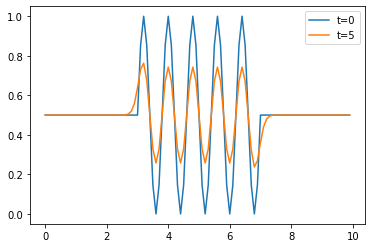

In [34]:
k = 5

C5 = np.copy(C)
C5[round(3 / dx): round(7 / dx), 0] = 0.5 + 0.5 * np.sin(k * 2 * np.pi * (np.arange(3, 7, dx) - 3) / 4)
C5 = diffusie(t, x, D, C5, dx, dt)

plt.plot(x, C5[:, 0], label='t=0')
plt.plot(x, C5[:, -1], label='t=5')
plt.legend()

F5 = C5[:, -1]

# Opgave 7.3c

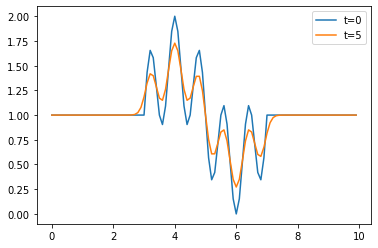

In [35]:
Cs = np.copy(C)
Cs[:, 0] = C1[:, 0] + C5[:, 0]
Cs = diffusie(t, x, D, Cs, dx, dt)

plt.plot(x, Cs[:, 0], label='t=0')
plt.plot(x, Cs[:, -1], label='t=5')
plt.legend()

Fs = Cs[:, -1]

# Opgave 7.3d

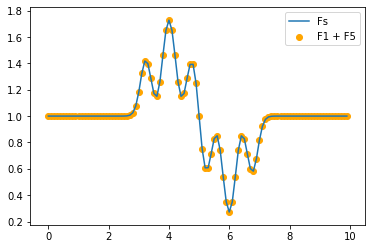

In [36]:
plt.plot(x, Fs, label='Fs')
plt.scatter(x, F1 + F5, label='F1 + F5', color='orange')
plt.legend()
plt.show()

Dus ja, de simulaties voldoen aan het superposite principe. We kunnen dit zien doordat de twee grafieken precies overlappen.